In [ ]:
# GENSIM
# INSTRUCTIONS: run this code, stop the runtime, then skip this cell and run the
# second cell.
!pip install --no-cache-dir --upgrade numpy scipy gensim
!pip install --no-cache-dir pandas==2.2.2  # Reinstall the required pandas version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 147.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import gensim
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Gensim version:", gensim.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
Gensim version: 4.3.3


In [ ]:
# From Spacy Tutorial Notebook (author: Jerónimo Arenas-García)
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

#For fancy table Display
%load_ext google.colab.data_table

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# folder_path= ('/content/drive/Othercomputers/Asus Zenbook 14/Degree/Y3 S2/ML Applications/Project')
folder_path = "/content/drive/My Drive/MLA Project"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
# LEMMATIZATION WITH NLTK
# Obtained better results than with Spacy.
# Added on a second round POS treatment to pipeline, it improved the results.

In [ ]:
# All code needed to start from this point
import nltk

# Function adapted from Vectorization I (Jerónimo Arenas-García, Lorena Calvo-Bartolomé, Jesús Cid-Suero)
def check_nltk_packages():
    nltk_paths = {
        'punkt': 'tokenizers/punkt',
        'stopwords': 'corpora/stopwords',
        'wordnet': 'corpora/wordnet',
        'omw-1.4': 'corpora/omw-1.4',
        'averaged_perceptron_tagger': 'taggers/averaged_perceptron_tagger'
    }

    for package, path in nltk_paths.items():
        try:
            nltk.data.find(path)
        except LookupError:
            nltk.download(package)

check_nltk_packages()

# Install other external libraries if needed
try:
    import lxml
except ModuleNotFoundError:
    %pip install lxml

try:
    import contractions
except ModuleNotFoundError:
    %pip install contractions
    import contractions

try:
    import langid
except ModuleNotFoundError:
    %pip install langid
    import langid

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')

# BeautifulSoup and regular expressions
from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# OBS: added to previous code block, should not be needed
# Download the Averaged Perceptron Tagger model for part-of-speech (POS) tagging in English, used to assign POS tags to words in a sentence.
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('punkt_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

import langid

In [ ]:
# Read file to upload text
reviews_df = pd.read_csv('recipes/recipe_reviews.csv')
print(len(reviews_df))

In [ ]:
# Refine Nltk function to detect relevant POS
# Incorporate detection of english language as in Spacy.
def is_english(text):
    # Detect the language of the text
    lang, _ = langid.classify(text)
    return lang == 'en'

def prepare_data(text, wnl, stopwords_list):
    # Ensure we are dealing with strings and that text is in English
    if not isinstance(text, str) or not is_english(text):
        return None
    else:
        # Remove HTML tags
        soup = BeautifulSoup(text, "lxml")
        text = soup.get_text()

        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)

        # Expand contractions
        wrangled_text = contractions.fix(text)

        # Tokenization
        review_tokens = word_tokenize(wrangled_text)

        # POS tagging
        pos_tags = pos_tag(review_tokens)

        # Initialize the lemmatizer
        lemmatizer = wnl

        lemmatized_tokens = []

        for word, pos in pos_tags:
            # Keep only nouns, verbs, adjectives
            if pos.startswith('NN'):
                pos = 'n'  # Noun
            elif pos.startswith('VB'):
                pos = 'v'  # Verb
            elif pos.startswith('JJ'):
                pos = 'a'  # Adjective
            # elif pos.startswith('RB'):
            #    pos = 'r'  # Adverb
            else:
                # Ignore other POS
                continue

            # Lemmatize the word using the appropriate POS tag
            lemmatized_token = lemmatizer.lemmatize(word, pos)
            lemmatized_tokens.append(lemmatized_token)

        # Lowercasing and filtering non-alphanumeric tokens. Ultimately, take out digits as not useful in our Gensim dictionary.
        review_tokens_filtered = [token.lower() for token in lemmatized_tokens if token.isalnum() and not token.isdigit()]

        # Remove stopwords
        exclude_lemmas = ['doe', 'wa']
        clean_review = [token for token in review_tokens_filtered if token not in stopwords_list and token not in exclude_lemmas]

        # Return the cleaned list of tokens
        return clean_review

In [ ]:
# Apply the function to all reviews in corpus_df and store in 'nltk_lemmas'
wnl = WordNetLemmatizer()
stopwords_en = set(stopwords.words('english'))
custom_stopwords = {'extra', 'without', 'enough', 'would', 'could', 'lot', 'thank', 'thanks', 'also', 'well', 'much', 'many', 'another', 'others', 'though', 'instead'}
combined_stopwords = stopwords_en.union(custom_stopwords)
reviews_df["nltk_lemmas"] = reviews_df["review"].apply(prepare_data, args=(wnl, combined_stopwords))

<ipython-input-29-a0eb69b60e55>:14: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  soup = BeautifulSoup(text, "lxml")


In [ ]:
reviews_df.head()

,recipe_id,recipe,user,rating,date,review,nltk_lemmas
0,1,Cheesy Amish Breakfast Casserole,Deborah Schmidt,5,01/01/2013,This has been my go-to recipe for a long time ...,"[recipe, long, time, post, delicious, stand, a..."
1,1,Cheesy Amish Breakfast Casserole,SR,5,11/01/2023,It was fabulous!Things I did different:1. I us...,"[fabulous, things, use, crumbled, bacon, costc..."
2,1,Cheesy Amish Breakfast Casserole,QuickOrzo5381,5,04/16/2023,I’ve been making this for my family for 10+ ye...,"[make, family, year, kid, young, bake, muffin,..."
3,1,Cheesy Amish Breakfast Casserole,imajwru,4,04/22/2023,Responding to the greasiness issue. Best way t...,"[responding, greasiness, issue, best, way, avo..."
4,1,Cheesy Amish Breakfast Casserole,Mary Heston,5,01/03/2024,I have been making this recipe for several yea...,"[make, recipe, several, year, use, ground, sau..."


In [ ]:
# Check number of reviews before saving csv
print(len(reviews_df))

111613


In [ ]:
# Store in csv file the full dataset, including reviews that have no text (only stars)
reviews_df.to_csv("all_reviews_lemmas_2.csv", index=False, encoding='utf-8')

In [ ]:
# Recover stored csv to start from this point
reviews_df = pd.read_csv('all_reviews_lemmas_2.csv')

In [ ]:
# Check number of reviews after recovering csv
print(len(reviews_df))

111613


In [ ]:
# Control whether the function has created 'nltl_lemmas'= None
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

2063


In [ ]:
# Eliminate reviews that only have stars, not text
reviews_df = reviews_df[reviews_df['nltk_lemmas'].notna()]

In [ ]:
# Check no more reviews without text
print(len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

0


In [ ]:
# Need to update the index in the dataframe to avoid problems when starting BoW
reviews_df = reviews_df.reset_index(drop=True)

In [ ]:
# Check the index has been updated and rows 11, 12 no longer missing
reviews_df.head(15)

,recipe_id,recipe,user,rating,date,review,nltk_lemmas
0,1,Cheesy Amish Breakfast Casserole,Deborah Schmidt,5,01/01/2013,This has been my go-to recipe for a long time ...,"['recipe', 'long', 'time', 'post', 'delicious'..."
1,1,Cheesy Amish Breakfast Casserole,SR,5,11/01/2023,It was fabulous!Things I did different:1. I us...,"['fabulous', 'things', 'use', 'crumbled', 'bac..."
2,1,Cheesy Amish Breakfast Casserole,QuickOrzo5381,5,04/16/2023,I’ve been making this for my family for 10+ ye...,"['make', 'family', 'year', 'kid', 'young', 'ba..."
3,1,Cheesy Amish Breakfast Casserole,imajwru,4,04/22/2023,Responding to the greasiness issue. Best way t...,"['responding', 'greasiness', 'issue', 'best', ..."
4,1,Cheesy Amish Breakfast Casserole,Mary Heston,5,01/03/2024,I have been making this recipe for several yea...,"['make', 'recipe', 'several', 'year', 'use', '..."
5,1,Cheesy Amish Breakfast Casserole,Anonymous,5,01/01/2024,My whole family LOVED this! I’m not one who gr...,"['whole', 'family', 'loved', 'grow', 'make', '..."
6,1,Cheesy Amish Breakfast Casserole,Helcat,4,05/04/2023,This is 5 stars as is. The reviews complaining...,"['star', 'review', 'complain', 'bit', 'potato'..."
7,1,Cheesy Amish Breakfast Casserole,Kevin Beth Garverick,5,03/03/2024,I have made this recipe both with bacon and wi...,"['make', 'recipe', 'bacon', 'sausage', 'add', ..."
8,1,Cheesy Amish Breakfast Casserole,Kitchen sweets,4,05/09/2024,I loved the simplicity of this casseroleHoweve...,"['love', 'simplicity', 'casserolehowever', 'us..."
9,1,Cheesy Amish Breakfast Casserole,Clarissa,5,04/10/2023,Guests loved it. The changes I made: we had le...,"['guests', 'love', 'change', 'make', 'leftover..."


In [ ]:
review_idx=10000
print('============= Review =============')
print(reviews_df.loc[review_idx, 'review'], '\n')

print('============= Lemmas Nltk =============')
print(reviews_df.loc[review_idx, 'nltk_lemmas']
)

============= Review =============
Tasty and pretty easy!! thought there would be too much cake batter as I was getting it together, but what do I know.  Was right.  Going to cut down on the amount of flour and other ingredients and maybe it won't spill all over the oven.  Other than that this is a keeper.  Hubby got in to it last in the middle of the night. 

============= Lemmas Nltk =============
['tasty', 'easy', 'thought', 'cake', 'batter', 'get', 'know', 'right', 'going', 'cut', 'amount', 'flour', 'ingredient', 'maybe', 'spill', 'oven', 'keeper', 'hubby', 'get', 'last', 'middle', 'night']


In [ ]:
# Store in csv file the dataset with lemmas for reviews that contain text
# reviews_df.to_csv("reviews_lemmas.csv", index=False, encoding='utf-8')

In [ ]:
# reviews=reviews_df['review'].values.tolist()

In [ ]:
# Import libraries
import gc
import scipy
from gensim.corpora import Dictionary

# Presentation of figures, code from Text Vectorization II (Lorena Calvo-Bartolomé)
# Figures plotted inside the notebook
%matplotlib inline
# High quality figures
%config InlineBackend.figure_format = 'retina'
# Figures style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("darkgrid")
sns.color_palette("deep")
# Figues size
plt.rcParams['figure.figsize'] = [8, 6]

# Supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore',module='compress_fasttext')

In [ ]:
# Generate Gensim corpus from reviews_df
corpus=reviews_df['nltk_lemmas'].values.tolist()

print('Number of documents in corpus: ',len(corpus))

Number of documents in corpus:  109550


In [ ]:
print((corpus[0:1]))

["['recipe', 'long', 'time', 'post', 'delicious', 'stand', 'adaptable', 'cut', 'recipe', 'half', 'make', 'pan', 'add', 'particular', 'order', 'mince', 'jalapeno', 'drained', 'rotel', 'tomato', 'chili', 'green', 'pepper', 'red', 'pepper', 'turkey', 'sausage', 'hot', 'sausage', 'bacon', 'various', 'cheese', 'regular', 'depend', 'hand', 'please', 'note', 'add', 'list', 'possible', 'addition', 'hand', 'halve', 'recipe', 'enthusiastic', 'addition', 'use', 'egg', 'use', 'package', 'hash', 'brown', 'place', 'plain', 'hash', 'brown', 'suggestion', 'thing', 'find', 'cheese', 'replace', 'cottage', 'cheese', 'essential', 'creaminess', 'time', 'make', 'casserole', 'edible', 'good', 'usual', 'make', 'sunday', 'morning', 'cut', 'leftover', 'square', 'refrigerate', 'freeze', 'eat', 'week', 'delicious', 'addition', 'allrecipes']"]


In [ ]:
# When uploading from csv, list in lemmas col is read as a string, need to transform it into a python list
import ast
reviews_df['nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(ast.literal_eval)
corpus = reviews_df['nltk_lemmas'].tolist()

In [ ]:
# Create dictionary of tokens
D = Dictionary(corpus)
n_tokens = len(D)
print('Number of tokens in Dictionary: ',n_tokens)

# Limit the minimum number of documents in which a term has to appear to be included in Gensim dictionary
no_below = 20
# Limit the maximum proportion of documents in which a term may appear to be included in Gensim dictionary
no_above = .80

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

# Extract the vocabulary
vocab = list(D.token2id.keys())
print(vocab[0:30])

Number of tokens in Dictionary:  25860
The dictionary contains 3797 terms
['adaptable', 'add', 'addition', 'allrecipes', 'bacon', 'brown', 'casserole', 'cheese', 'chili', 'cottage', 'creaminess', 'cut', 'delicious', 'depend', 'drained', 'eat', 'edible', 'egg', 'essential', 'find', 'freeze', 'good', 'green', 'half', 'halve', 'hand', 'hash', 'hot', 'jalapeno', 'leftover']


In [ ]:
# Keep labels of 'Ratings' for later use
Y = reviews_df['rating'].values

Average number of tokens per review: 19.56


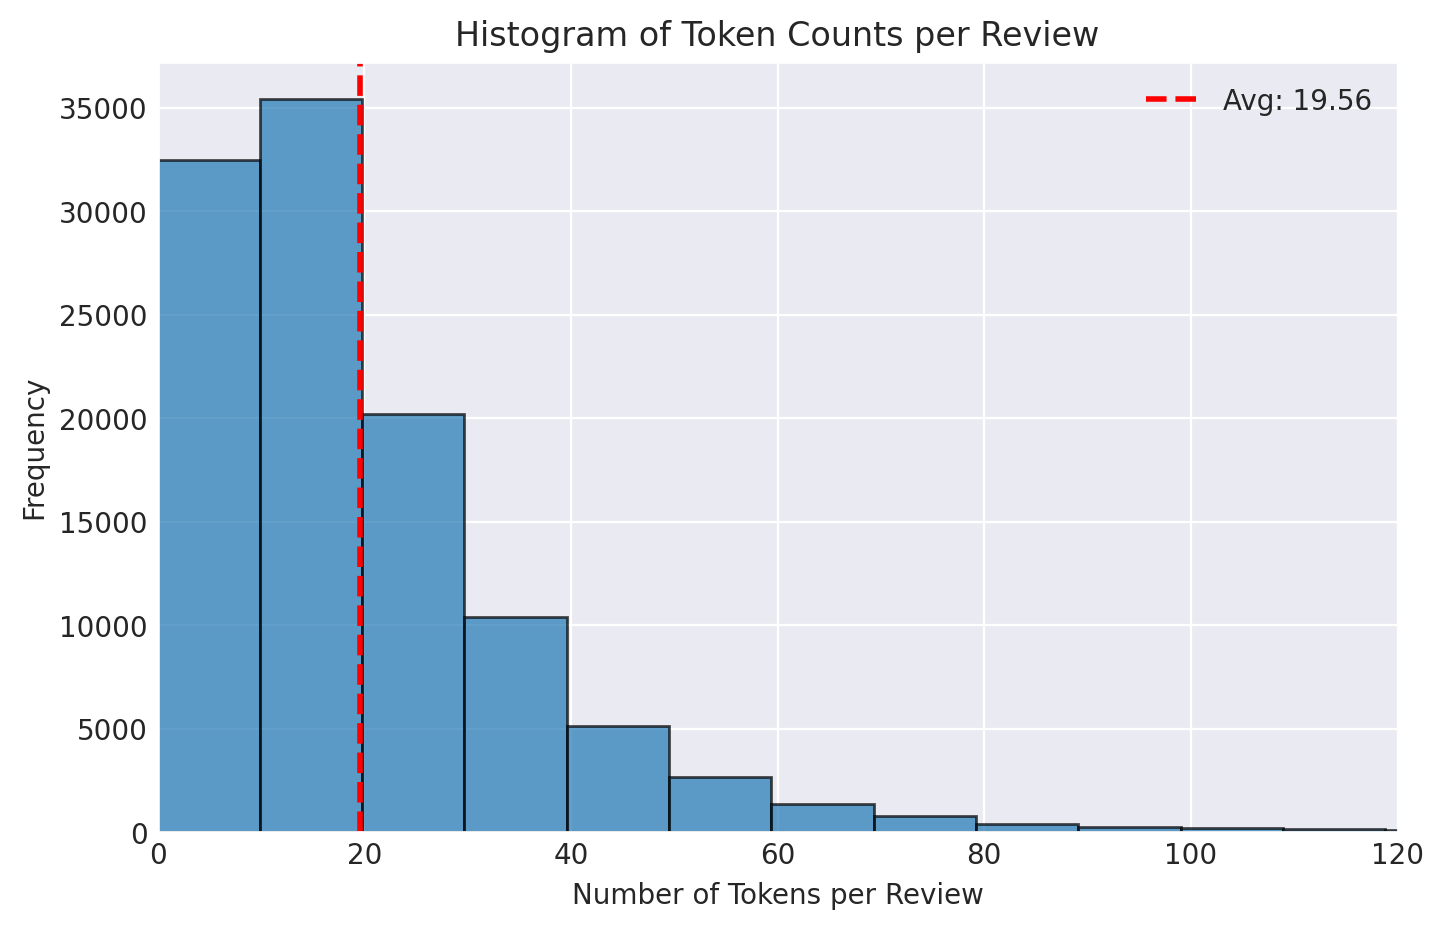

In [ ]:
# Get the number of tokens per document
token_counts = [len(doc) for doc in corpus]

# Compute the average number of tokens per review
avg_tokens = np.mean(token_counts)

# Define x-axis limits (Modify these values as needed)
x_min = 0
x_max = max(token_counts) + 10
x_max_man = 120

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(token_counts, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Tokens per Review")
plt.ylabel("Frequency")
plt.title("Histogram of Token Counts per Review")
plt.axvline(avg_tokens, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {avg_tokens:.2f}')
plt.legend()
# Set x-axis limits
plt.xlim(x_min, x_max_man)

# Print the average number of tokens
print(f"Average number of tokens per review: {avg_tokens:.2f}")

plt.show()

In [ ]:
# Check if it is useful to recover bigrams in this context
from gensim.models.phrases import Phrases

In [ ]:
bigram_model = Phrases(corpus, min_count=25, threshold=40)
corpus = [bigram_model[sentence] for sentence in corpus]

In [ ]:
bigram_list = list(bigram_model.export_phrases())
print(bigram_list, len(bigram_list))
# To judge with all dataset whether it is worth to keep the n-grams

['hash_brown', 'cottage_cheese', 'muffin_tin', 'bacon_grease', 'paper_towel', 'smoked_paprika', 'charcoal_grill', 'swiss_cheese', 'aluminum_foil', 'christmas_morning', 'light_fluffy', 'crock_pot', 'crowd_pleaser', 'huge_fan', 'huge_hit', 'big_hit', 'christmas_eve', 'gluten_free', 'trader_joe', 'read_review', 'low_carb', 'last_night', 'year_old', 'cover_foil', 'sour_cream', 'low_sodium', 'picky_eater', 'heavy_cream', 'dice_tomato', 'huge_success', 'slow_cooker', 'grate_parmesan', 'bacon_dripping', 'plain_yogurt', 'comfort_food', 'greek_yogurt', 'get_rid', 'personal_preference', 'cole_slaw', 'cider_vinegar', 'let_sit', 'apple_cider', 'sesame_seed', 'olive_oil', 'slotted_spoon', 'balsamic_vinegar', 'wine_vinegar', 'mason_jar', 'staple_house', 'rave_review', 'pulled_pork', 'canola_oil', 'miracle_whip', 'pot_luck', 'food_processor', 'virgin_olive', 'lime_juice', 'store_buy', 'equal_part', 'mother_law', 'definite_keeper', 'caraway_seed', 'fit_bill', 'granny_smith', 'smith_apple', 'dried_cran

In [ ]:
# And recompose the dictionary
# Create dictionary of tokens
D = Dictionary(corpus)
n_tokens = len(D)
print('Number of tokens in Dictionary: ',n_tokens)

# Limit the minimum number of documents in which a term has to appear to be included in Gensim dictionary
no_below = 20
# Limit the maximum proportion of documents in which a term may appear to be included in Gensim dictionary
no_above = .80

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('Number of tokens in Dictionary after filtering extremes: ', n_tokens, 'terms')

# Extract the vocabulary
vocab = list(D.token2id.keys())
print(vocab[0:30])

Number of tokens in Dictionary:  26204
Number of tokens in Dictionary after filtering extremes:  4041 terms
['adaptable', 'add', 'addition', 'allrecipes', 'bacon', 'casserole', 'cheese', 'chili', 'cottage_cheese', 'creaminess', 'cut', 'delicious', 'depend', 'drained', 'eat', 'edible', 'egg', 'essential', 'find', 'freeze', 'good', 'green', 'half', 'halve', 'hand', 'hash_brown', 'hot', 'jalapeno', 'leftover', 'list']


In [ ]:
# OBS: run to store the corpus and the Gensim dictionary
# Store the elements in the resulting corpus in a file (to be able to recover it once the full corpus has been generated)
with open("reviews_corpus.txt", 'w', encoding='utf-8') as fout:
  for element in corpus:
    fout.write(' '.join(element) + '\n')

# Save the Gensim dictionary
D.save("reviews_dictionary.dict")

In [ ]:
# BoW
reviews_bow = [D.doc2bow(doc) for doc in corpus]

In [ ]:
# Check for one review the result
n_review = 210

print('============= Review =============')
print(reviews_df.loc[n_review, 'review'])

print('\n============= Review (lemmas) =============')
print(' '.join(corpus[n_review]))

print('\n============= Sparse vector representation =============')
print(reviews_bow[n_review])

print('\n============= Word counts for the review =============')
print(list(map(lambda x: (D[x[0]], x[1]), reviews_bow[n_review])))

============= Review =============
It is the best! I bought broccoli slaw and used this dressing recipe.  Had to go back to the store the next day and get another bag. 
I put it in a Mason jar and that 2nd batch only lasted 2 days.  It’s that good…

============= Review (lemmas) =============
best buy broccoli slaw use dress recipe go store next day get bag put mason_jar batch last day

============= Sparse vector representation =============
[(45, 1), (60, 1), (93, 2), (95, 1), (105, 1), (122, 1), (139, 1), (212, 1), (217, 1), (240, 1), (279, 1), (409, 1), (753, 1), (759, 1), (832, 1), (856, 1), (868, 1)]

============= Word counts for the review =============
[('recipe', 1), ('use', 1), ('day', 2), ('go', 1), ('best', 1), ('put', 1), ('broccoli', 1), ('get', 1), ('bag', 1), ('next', 1), ('buy', 1), ('last', 1), ('dress', 1), ('slaw', 1), ('store', 1), ('batch', 1), ('mason_jar', 1)]


In [ ]:
# TF-IDF
from gensim.models import TfidfModel
# Train and transform
tfidf = TfidfModel(reviews_bow)
reviews_tfidf = tfidf[reviews_bow]

In [ ]:
print(reviews_tfidf[n_review])

[(45, 0.046431984028711154), (60, 0.061274784449130835), (93, 0.36814806970517333), (95, 0.1472498721752215), (105, 0.1680436842206736), (122, 0.1557659464289315), (139, 0.2585727341372519), (212, 0.14402477686838824), (217, 0.24925566617583506), (240, 0.1286553042547924), (279, 0.2289410056300171), (409, 0.21751486852054303), (753, 0.28331073891576053), (759, 0.35259476362085096), (832, 0.2598077801493435), (856, 0.2265915061556122), (868, 0.44150892241965267)]


In [ ]:
# To upload dictionary from file, once we have the corpus calculated for the whole dataset
class IterableCorpus_fromfile:
    def __init__(self, filename):
        self.__filename = filename

    def __iter__(self):
        with open(self.__filename, 'r', encoding='utf-8') as fin:
            for line in fin:
                yield line.strip().split()

MyIterCorpus = IterableCorpus_fromfile('reviews_corpus.txt')
D = Dictionary()
for doc in MyIterCorpus:
    D.add_documents([doc])

# OBS: modify values according to what was used creating the Dictionary
no_below = 20
no_above = .80
D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

In [ ]:
# Check we recover the same tokens than before writting/reading the file
print(n_tokens)

4041


In [ ]:
# OBS: run to store the corpus in an efficient way:
# Once the final dataset is created, use for efficiency and easy integration with LDA:
from gensim.corpora import MmCorpus

# Save
MmCorpus.serialize('reviews_corpus.mm', reviews_bow)

# Save the Gensim dictionary
D.save("reviews_dictionary.dict")

In [ ]:
# OBS: run to recover a Gensim dictionary and corpus (saved in another run)
# To recover the list of tokens, once we have stored the corpus in BoW form, need the Gensim dictionary
D = Dictionary.load("reviews_dictionary.dict")

from gensim.corpora import MmCorpus
corpus_bow = MmCorpus("reviews_corpus.mm")
corpus = [[D[id] for id, _ in doc] for doc in corpus_bow]

In [ ]:
len(corpus)

109550

In [ ]:
# Check we recover as review a list of tokens. Code from now on relies on this fact.
corpus[0]

['adaptable',
 'add',
 'addition',
 'allrecipes',
 'bacon',
 'casserole',
 'cheese',
 'chili',
 'cottage_cheese',
 'creaminess',
 'cut',
 'delicious',
 'depend',
 'drained',
 'eat',
 'edible',
 'egg',
 'essential',
 'find',
 'freeze',
 'good',
 'green',
 'half',
 'halve',
 'hand',
 'hash_brown',
 'hot',
 'jalapeno',
 'leftover',
 'list',
 'long',
 'make',
 'mince',
 'morning',
 'note',
 'order',
 'package',
 'pan',
 'particular',
 'pepper',
 'place',
 'plain',
 'please',
 'possible',
 'post',
 'recipe',
 'red',
 'refrigerate',
 'regular',
 'replace',
 'rotel',
 'sausage',
 'square',
 'stand',
 'suggestion',
 'sunday',
 'thing',
 'time',
 'tomato',
 'turkey',
 'use',
 'usual',
 'various',
 'week']

In [ ]:
# WOR2VEC
from gensim.models import Word2Vec

# Create an iterator over the sentences in the file, named sentences
sentences = IterableCorpus_fromfile("reviews_corpus.txt")
# OBS: increase min_count once we have complete dataset
model_word2vec = Word2Vec(sentences=sentences, vector_size=300, window=5, sg=1, min_count=2, seed=42, workers=4)

In [ ]:
# Check results
print('============= Word2Vec vocabulary =============')
words = list(model_word2vec.wv.key_to_index)
print(len(words))
print(words[99:130])

============= Word2Vec vocabulary =============
13671
['enjoy', 'dry', 'fantastic', 'whole', 'keep', 'potato', 'simple', 'dinner', 'yummy', 'meal', 'heat', 'share', 'powder', 'amazing', 'roll', 'oven', 'veggie', 'less', 'hand', 'side', 'suggest', 'know', 'beef', 'call', 'substitute', 'food', 'cayenne', 'review', 'star', 'mixture', 'broth']


In [ ]:
# Code to save and load the model, if needed
# Store
model_word2vec.save("model_word2vec_recipe_reviews.model")

In [ ]:
# Load
model_word2vec = Word2Vec.load("model_word2vec_recipe_reviews.model")

In [ ]:
from gensim.models import KeyedVectors

# In case we want to store just the words + their trained embeddings.
model_word2vec_wv= model_word2vec.wv
model_word2vec_wv.save("model_word2vec_recipe_reviews.wordvectors")

In [ ]:
# Load back with memory-mapping = read-only, shared across processes.
WE_word2vec = KeyedVectors.load("model_word2vec_recipe_reviews.wordvectors", mmap='r')

In [ ]:
len(model_word2vec.wv)

13671

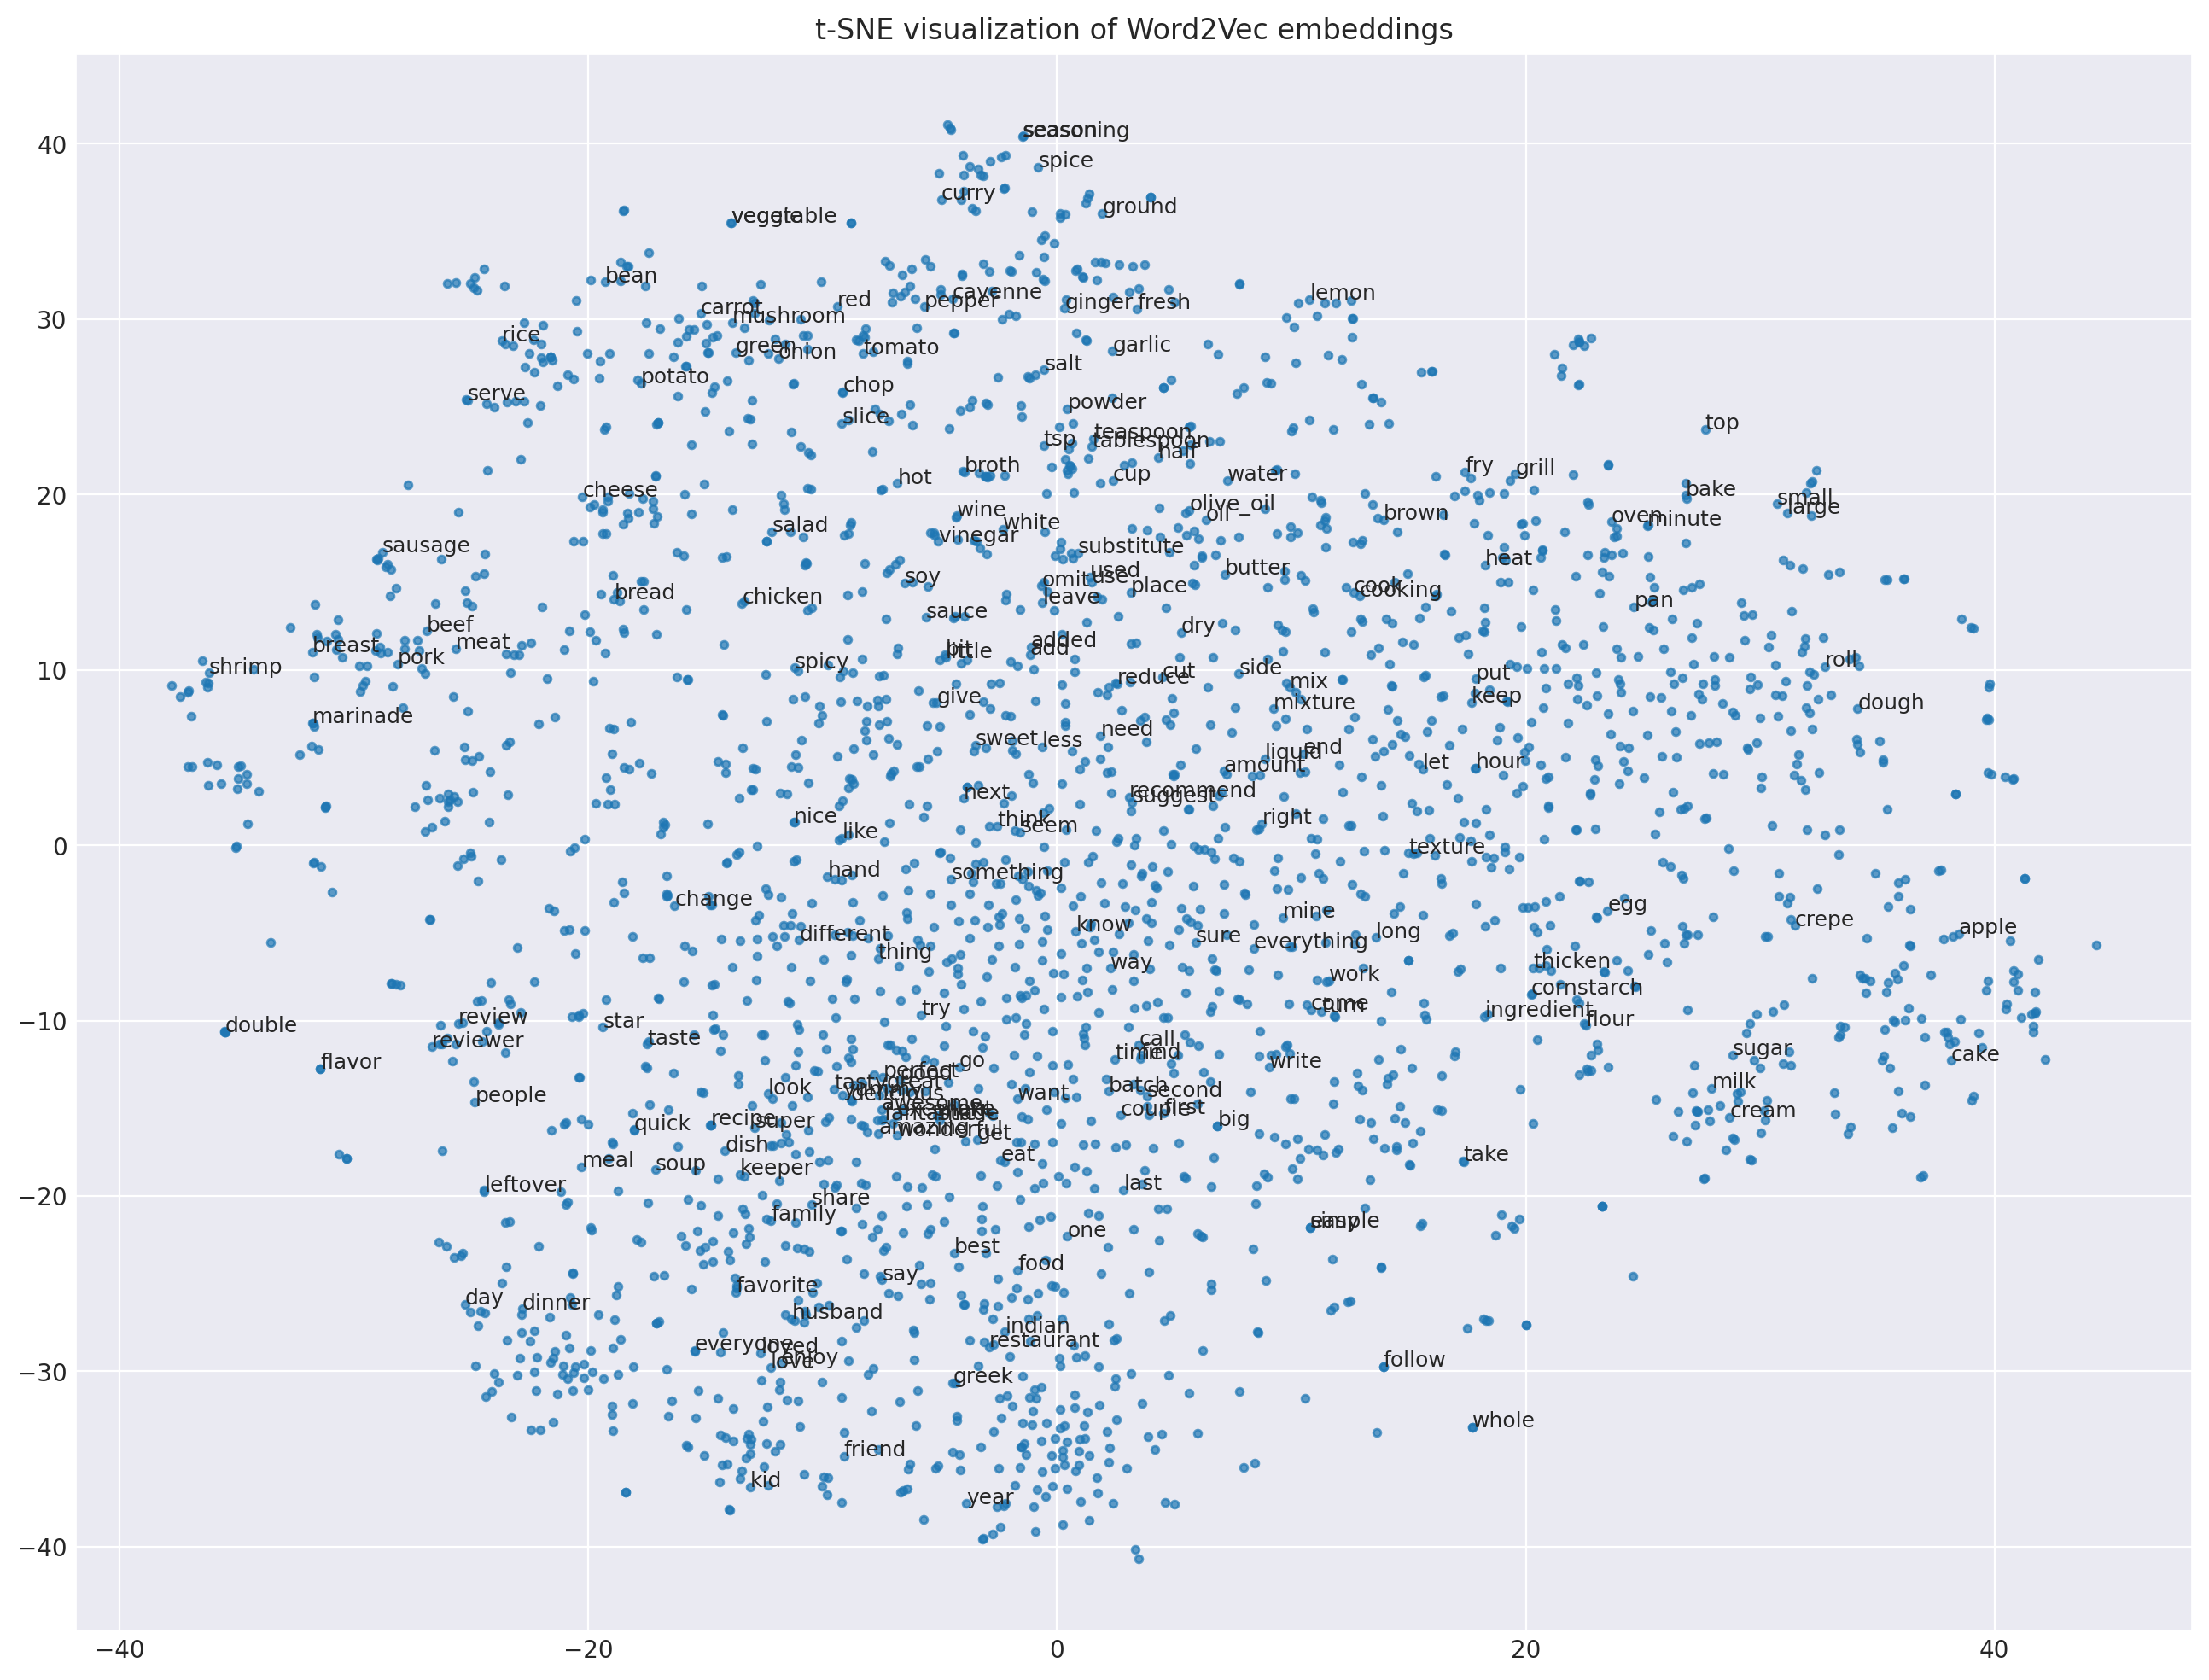

In [ ]:
from sklearn.manifold import TSNE

# Select the more relevant terms of the Word2Vec vocabulary
words = list(WE_word2vec.index_to_key)[:2500]
word_vectors = np.array([WE_word2vec[word] for word in words])

# Run t-SNE
# Perplexity: parameter that allows
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
reduced = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(16, 12))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, s=10)

# Label only some words to avoid cluttering
for i, word in enumerate(words[:200]):
    plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=9)

plt.title("t-SNE visualization of Word2Vec embeddings")
plt.show()


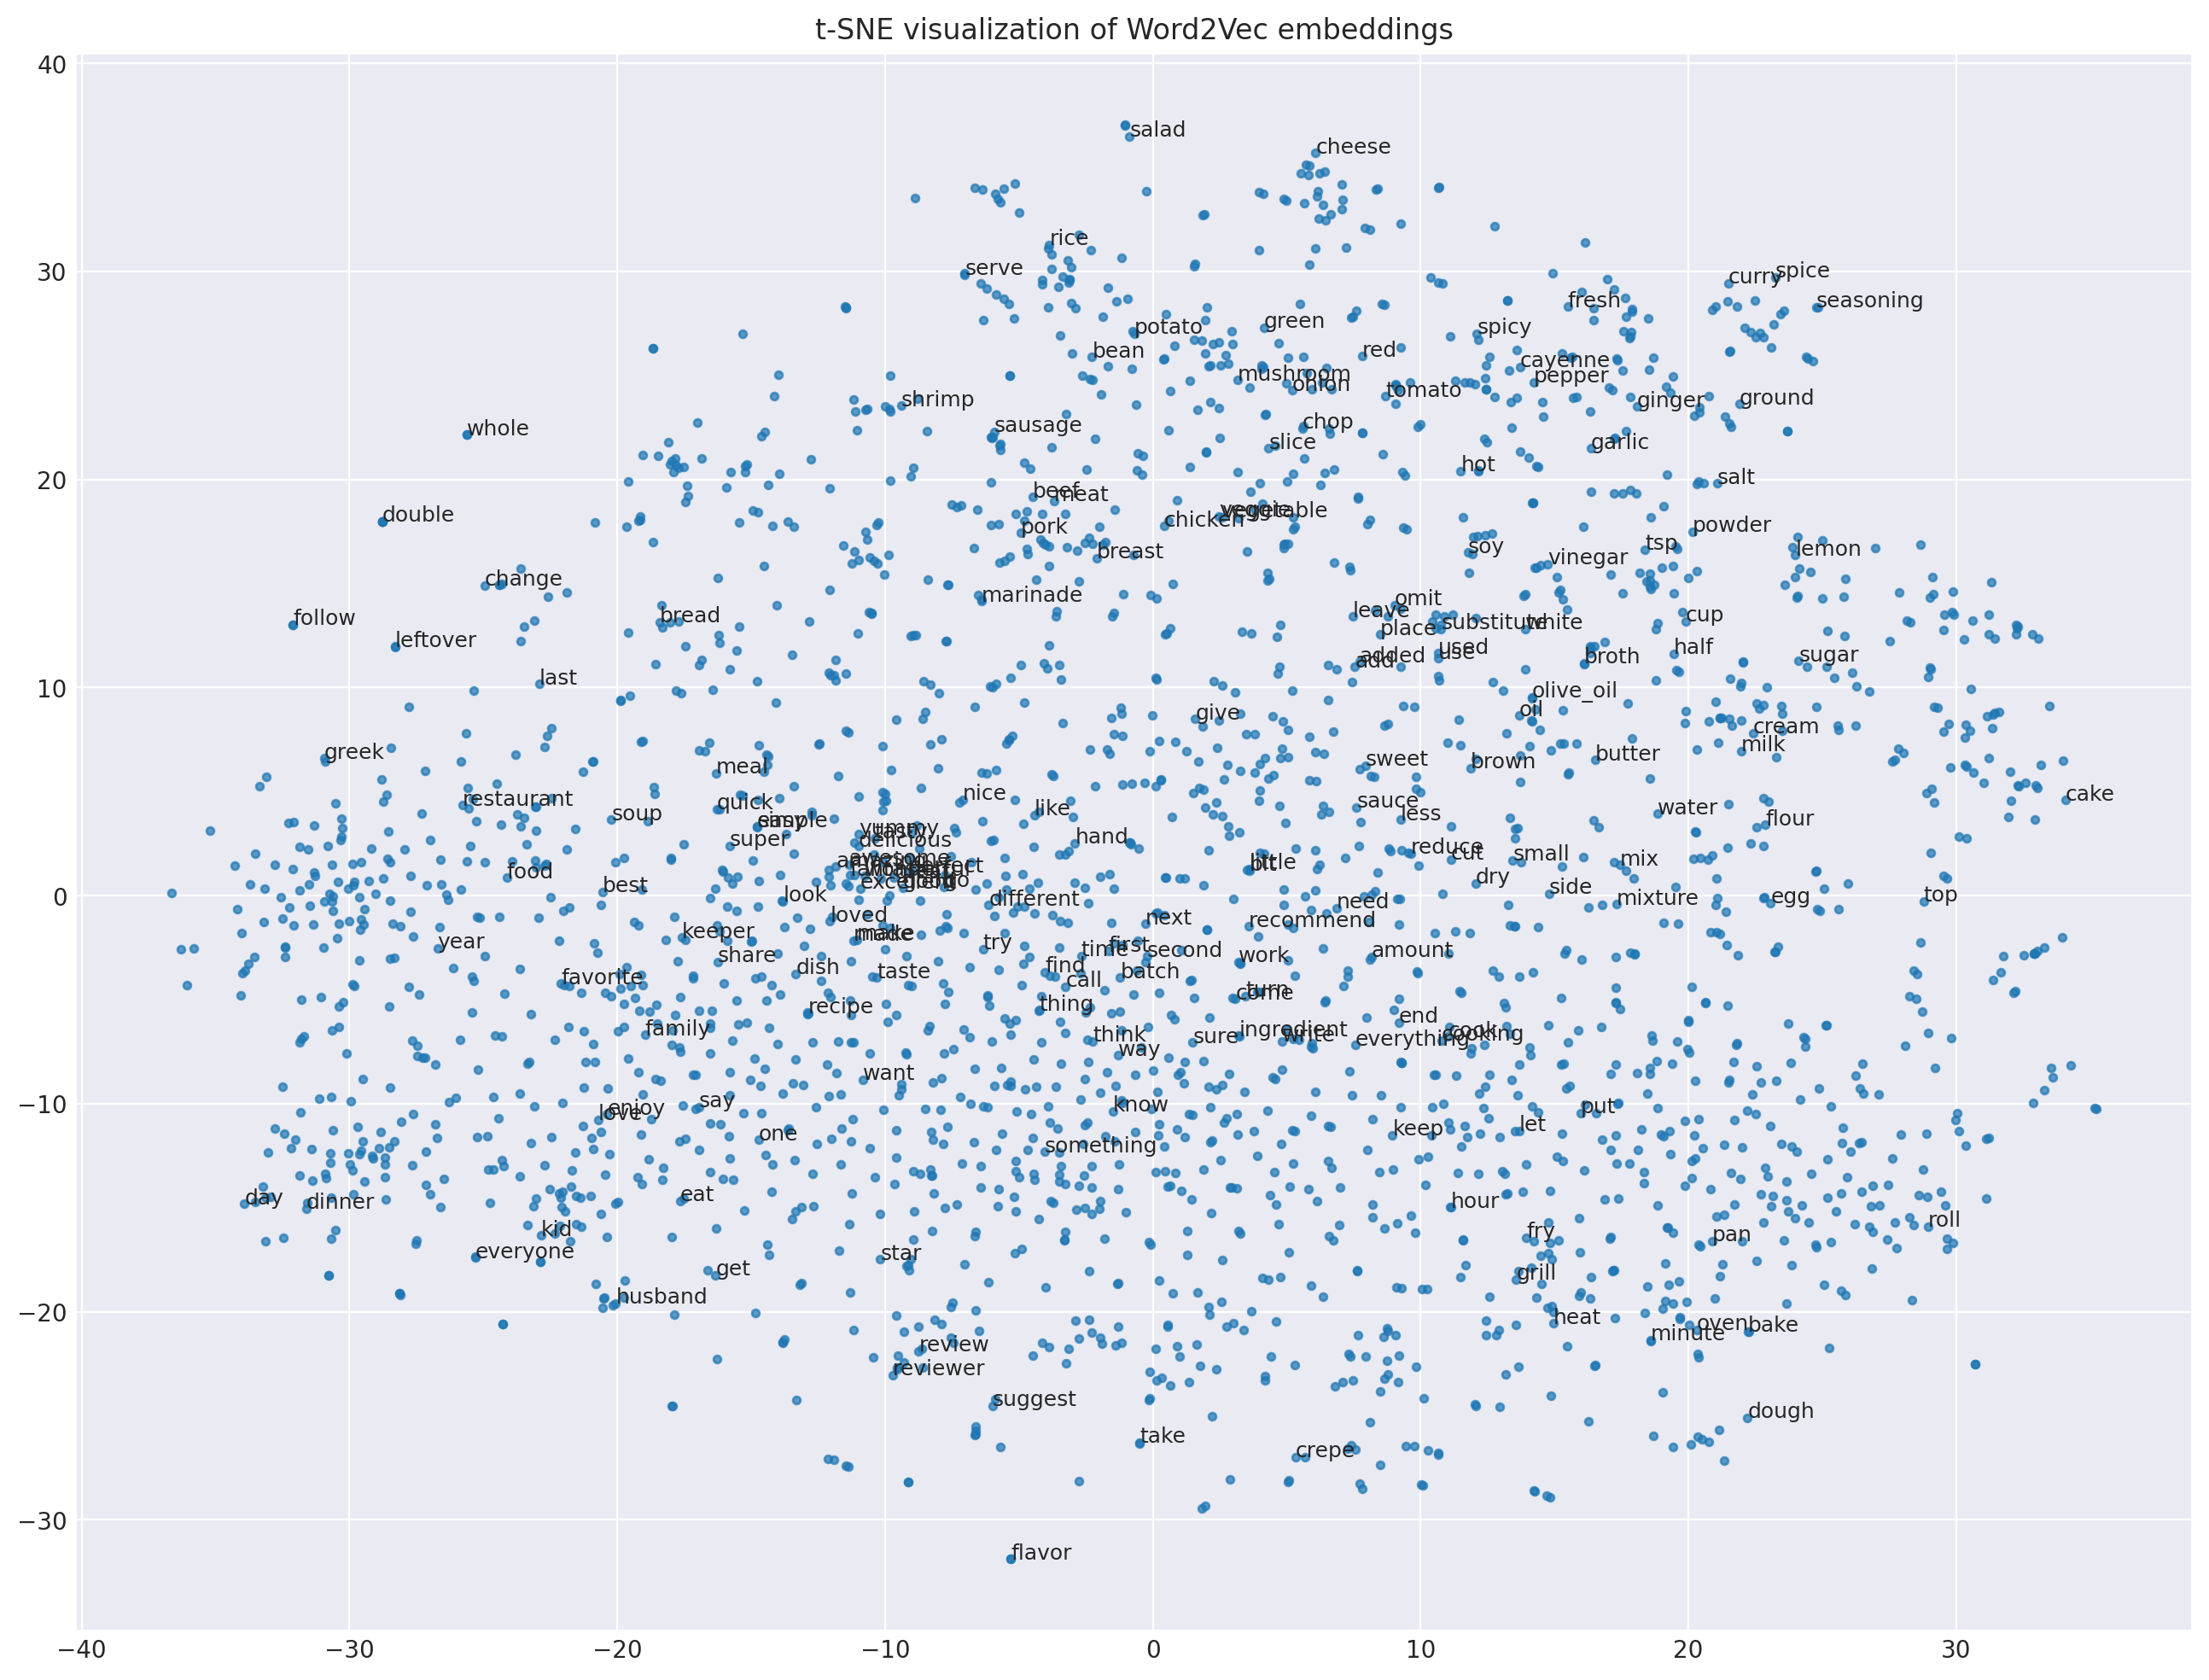

In [ ]:
from sklearn.manifold import TSNE

# Select the more relevant terms of the Word2Vec vocabulary
words = list(WE_word2vec.index_to_key)[:2500]
word_vectors = np.array([WE_word2vec[word] for word in words])

# Run t-SNE
# Perplexity: parameter that allows
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
reduced = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(16, 12))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, s=10)

# Label only some words to avoid cluttering
for i, word in enumerate(words[:180]):
    plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=9)

plt.title("t-SNE visualization of Word2Vec embeddings")
plt.show()


In [ ]:
# Use the functions created in Text Vect Lab to see the performance of our models (for the time being)
def get_vocabulary_coverage(model, gensim_dict):
    """
    Computes the vocabulary coverage of a Word2Vec model on a given Gensim dictionary.

    Args:
        model (gensim.models.KeyedVectors): The pre-trained word vectors.
        gensim_dict (gensim.corpora.Dictionary): The Gensim dictionary containing IMDB words.

    Returns:
        float: The percentage of words in the dictionary that exist in the Word2Vec model.
    """
    vocab = gensim_dict.token2id.keys()
    total_words = len(vocab)

    # Avoid division by zero
    if total_words == 0:
        return 0.0
    # Count words in Word2Vec
    in_vocab_count = sum(1 for word in vocab if word in model)

    # Compute coverage percentage
    coverage = (in_vocab_count / total_words) * 100

    return coverage

In [ ]:
# Import csr_matrix to store the final matrix efficiently
from scipy.sparse import csr_matrix

def get_review_vector(model, review):
    """
    Computes the embedding vector for a given review by averaging word embeddings.

    Args:
        model (gensim.models.KeyedVectors): The pre-trained word vectors.
        review (list of str): A list of tokens representing the review.

    Returns:
        numpy.ndarray: The average embedding vector for the review.
    """
    # Get word vectors, ignore OOV words. For each word in the review (that is in the model, no OOV words)
    # recover its WE.
    vectors = [model[word] for word in review if word in model]

    # If all words are OOV, return a zero vector
    if not vectors:
        return np.zeros(model.vector_size)
    # Compute average vector
    vec = np.mean(vectors, axis=0)

    return vec

In [ ]:
# Define a function to create the WE matrix
def create_review_matrix(model, corpus):
  # Corpus was our list of tokenized reviews
  n_reviews = len(corpus)
  # Get the dimension of word vectors
  embedding_size = model.vector_size

  # Create matrix to store review vectors
  review_matrix = np.zeros((n_reviews, embedding_size))

  # Compute review embeddings
  for i, review in enumerate(corpus):
      review_matrix[i] = get_review_vector(model, review)

  # Should be (n_reviews, embedding_size_word2vec)
  print(f"Embedding matrix shape: {review_matrix.shape}")
  return review_matrix

In [ ]:
# As our reviews are rated 1-5 stars, there is an implicit value in the order, perform regression.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_svm(review_matrix_model, Y, test_size= 0.30, param_grid= {'C': np.arange(1, 11, 2), 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0]}):
    # Prepare the data
    # Use the review embeddings as features
    X = review_matrix_model
    y = Y

    # Split the dataset (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Define SVR with GridSearchCV
    # param_grid = {'C': np.arange(1, 11, 2), 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0]}

    svr = SVR()
    grid = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Evaluate the best model
    best_model = grid.best_estimator_
    test_R2 = best_model.score(X_test, y_test)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Display results
    print(f"Best Hyperparameters: {grid.best_params_}")
    print(f"Test R2: {test_R2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

In [ ]:
#Calculate coverage by Word2Vec model
coverage = get_vocabulary_coverage(model_word2vec.wv, D)
print(f"Vocabulary Coverage: {coverage:.2f}%")

# Create the matrix of WE by Word2Vec model
review_matrix_word2vec = create_review_matrix(model_word2vec.wv, corpus)

# Regression with SVR
# regression_svm(review_matrix_word2vec, Y)

Vocabulary Coverage: 100.00%
Embedding matrix shape: (109550, 300)


In [ ]:
# GLOVE
from gensim import downloader
glove = downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
# Compare Glove model with our Word2Vec model
coverage = get_vocabulary_coverage(glove, D)
print("Coverage: ", coverage)

# Create the matrix of WE by Glove model
review_matrix_glove = create_review_matrix(glove, corpus)

# Regression
# regression_svm(review_matrix_glove, Y)

Coverage:  88.41870824053451
Embedding matrix shape: (109550, 50)


In [ ]:
# FASTTEXT
from gensim.models import FastText

In [ ]:
# Create the FastText model
# OBS: increase min_count once we have complete dataset
model_fasttext = FastText(sentences=sentences, vector_size=300, window=5, min_count=20,  sg=1, seed=42, workers=4, epochs=5)


In [ ]:
print(len(model_fasttext.wv))

4119


In [ ]:
# OBS: run in case we want to save the model
# Code to save and load the model, if needed

# Store
model_fasttext.save("model_fasttext_recipe_reviews.model")

In [ ]:
# Load
model_fasttext = FastText.load("model_fasttext_recipe_reviews.model")

In [ ]:
# In case we want to store only the WE

# Store just the words + their trained embeddings.
fasttext_wv = model_fasttext.wv
fasttext_wv.save("model_fastText.wordvectors")



In [ ]:
# Load back with memory-mapping = read-only, shared across processes.
fastText_wv = KeyedVectors.load("model_fastText.wordvectors", mmap='r')

In [ ]:
print(len(model_fasttext.wv))
print(len(fastText_wv))

4119
4119


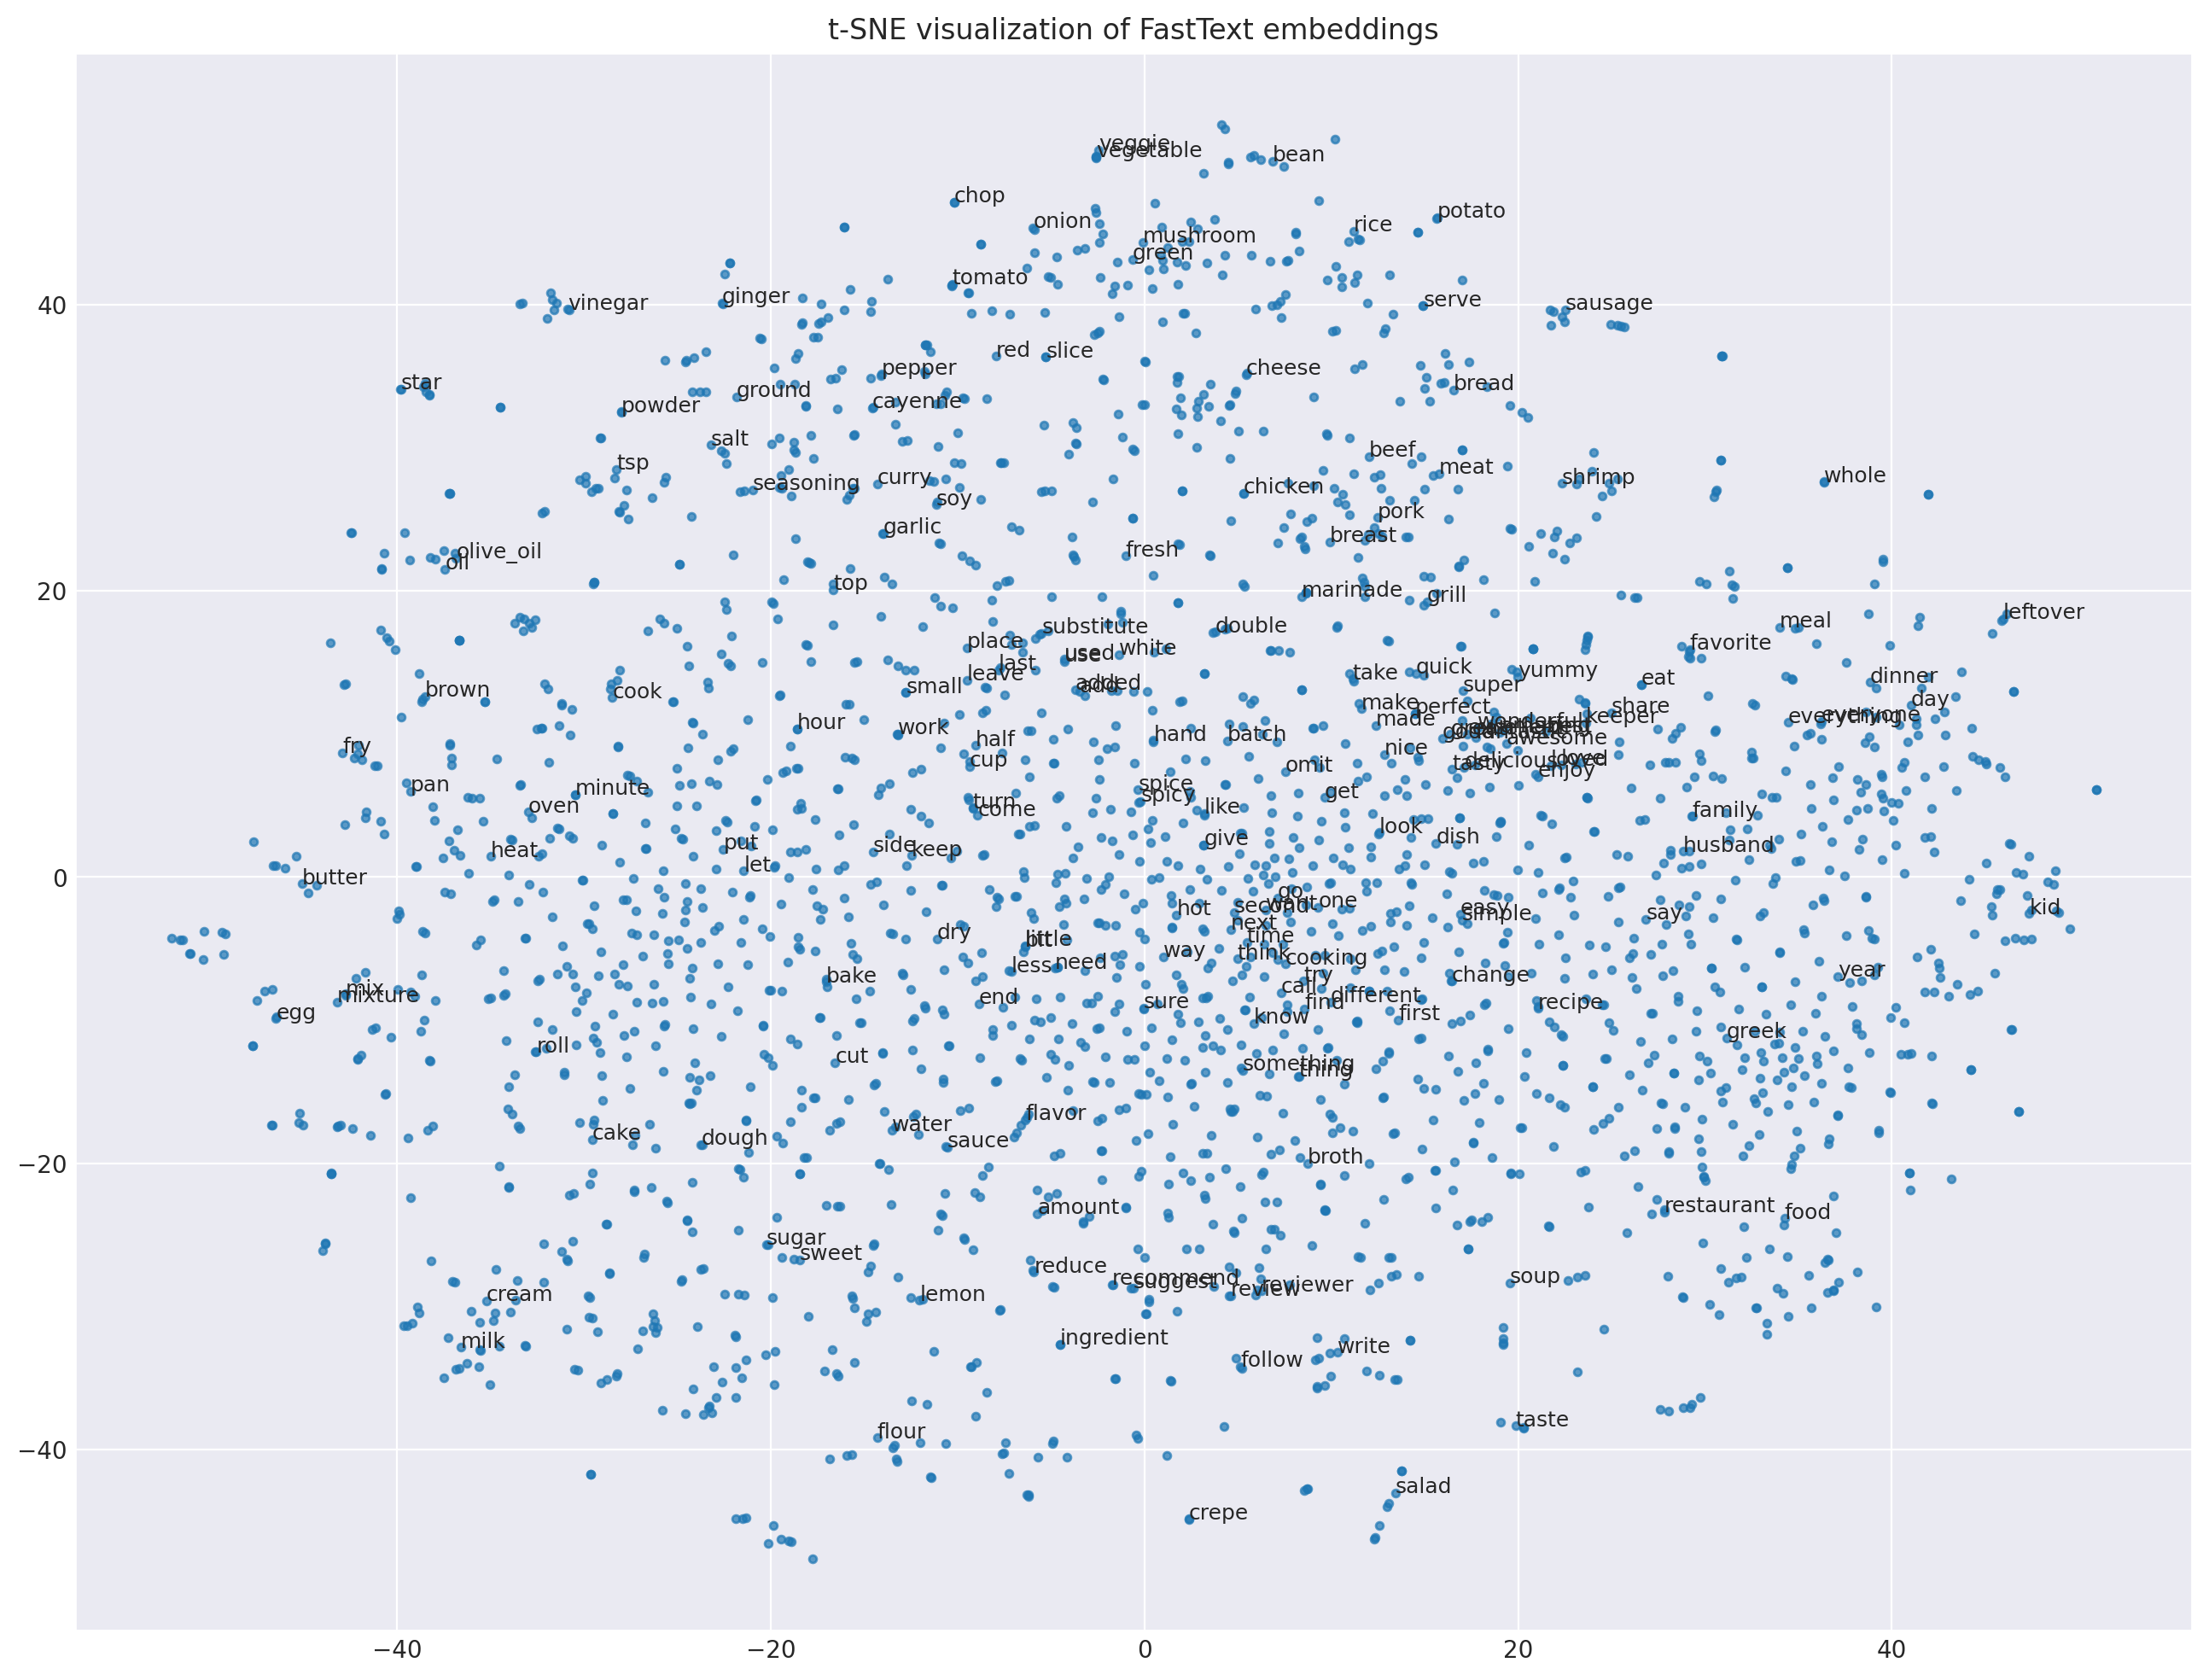

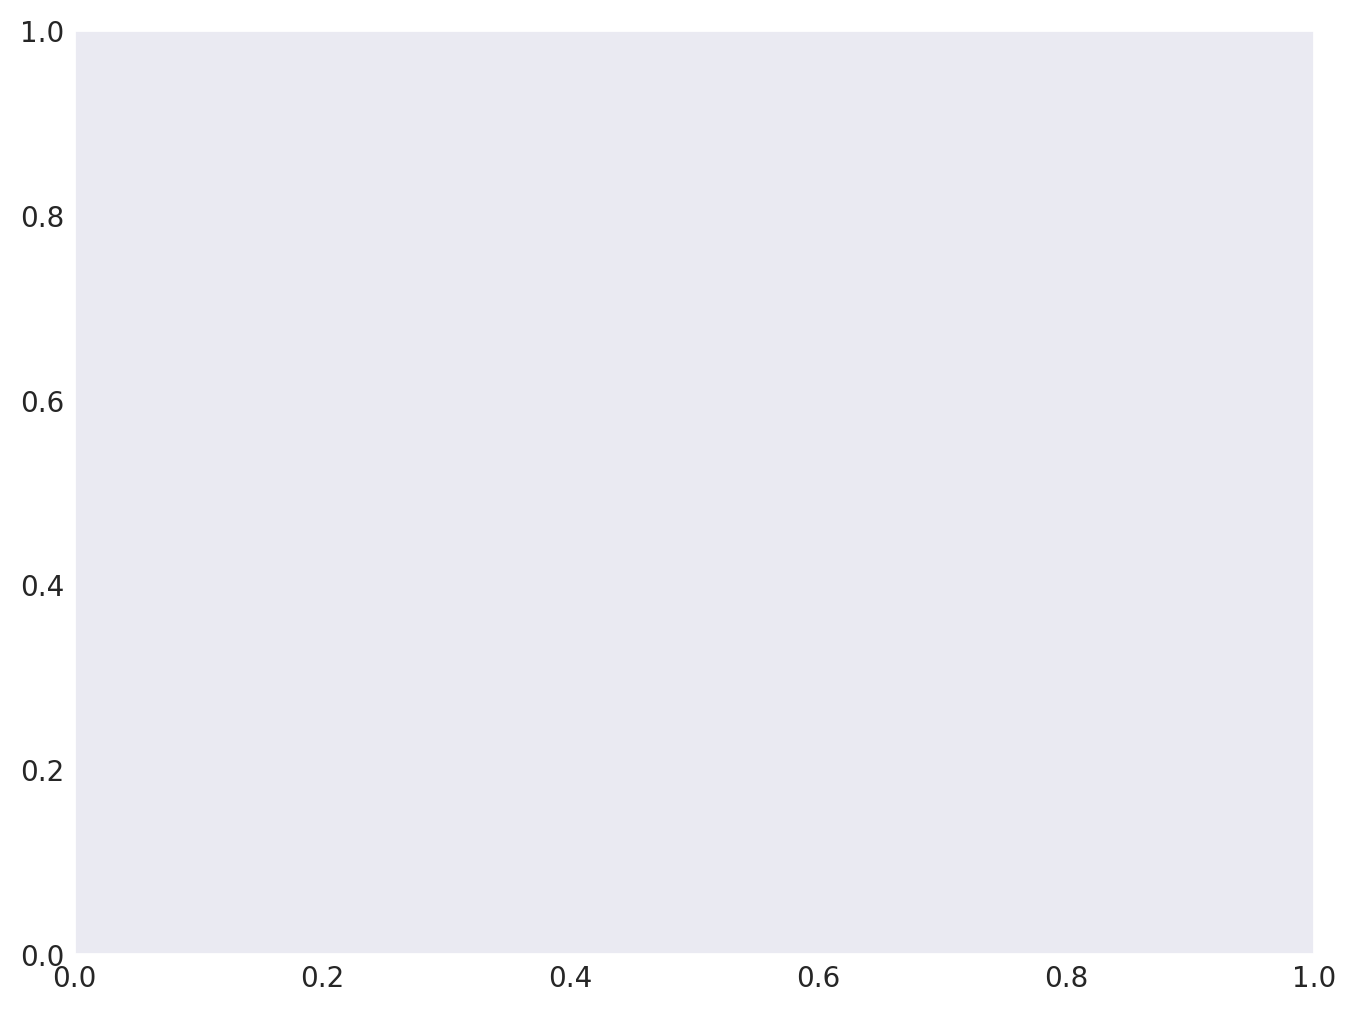

In [ ]:
# Select the more relevant terms of the FastText vocabulary
words_ft = list(fastText_wv.index_to_key)[:2500]
word_vectors_ft = np.array([fastText_wv[word] for word in words])

# Run t-SNE
# Perplexity: parameter that allows
tsne_ft = TSNE(n_components=2, perplexity=50, random_state=42)
reduced_ft = tsne_ft.fit_transform(word_vectors_ft)

# Plot
plt.figure(figsize=(16, 12))
plt.scatter(reduced_ft[:, 0], reduced_ft[:, 1], alpha=0.7, s=10)

# Label only some words to avoid cluttering
for i, word in enumerate(words_ft[:180]):
    plt.text(reduced_ft[i, 0], reduced_ft[i, 1], word, fontsize=9)

plt.title("t-SNE visualization of FastText embeddings")
plt.show()

In [ ]:
model_fasttext.wv.vectors.shape

(4119, 300)

In [ ]:
# Compare FastText model with our Word2Vec model
# If we have not stored model in file, and we are using the full model
coverage = get_vocabulary_coverage(model_fasttext.wv, D)
# Create the matrix of WE by FastText model
review_matrix_fasttext = create_review_matrix(model_fasttext.wv, corpus)

# If we have stored model in file and uploaded only the WE
# coverage = get_vocabulary_coverage(fastText_wv, D)
# review_matrix_fasttext = create_review_matrix(fastText_wv, corpus)
# Print result for coverage
print("Coverage: ", coverage)
# Regression
# regression_svm(review_matrix_fasttext, Y)

Embedding matrix shape: (109550, 300)
Coverage:  100.0


In [ ]:
# FastText pretrained
try:
  import compress_fasttext
except ModuleNotFoundError:
  %pip install compress-fasttext
  import compress_fasttext

  Preparing metadata (setup.py) ... done
  Created wheel for compress-fasttext: filename=compress_fasttext-0.1.5-py3-none-any.whl size=16098 sha256=170050a5762c5bd10411b5b1cd960a7796d40320dbb3ae561912fb64dfd69a4e
  Stored in directory: /root/.cache/pip/wheels/90/ed/77/0a7fc5e08ff30e062f09c6904844a5911a9e30a7e5ec376890
Successfully built compress-fasttext


In [ ]:
fastTextPre = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.4/cc.en.300.compressed.bin'
)

In [ ]:
# Compare pretrained FastText model with our FastText model
coverage = get_vocabulary_coverage(fastTextPre, D)
print("Coverage: ", coverage)

# Create the matrix of WE by FastText model
review_matrix_fasttextPre = create_review_matrix(fastTextPre, corpus)

# Regression
# regression_svm(review_matrix_fasttextPre, Y)

Coverage:  100.0


Embedding matrix shape: (109550, 300)


In [ ]:
# EXPLORE FINAL DATASET
reviews_all_df = pd.read_csv('recipes/recipe_reviews.csv')
print(len(reviews_all_df))


111613


,recipe_id,recipe,user,rating,date,review
0,1,Cheesy Amish Breakfast Casserole,Deborah Schmidt,5,01/01/2013,This has been my go-to recipe for a long time ...
1,1,Cheesy Amish Breakfast Casserole,SR,5,11/01/2023,It was fabulous!Things I did different:1. I us...
2,1,Cheesy Amish Breakfast Casserole,QuickOrzo5381,5,04/16/2023,I’ve been making this for my family for 10+ ye...
3,1,Cheesy Amish Breakfast Casserole,imajwru,4,04/22/2023,Responding to the greasiness issue. Best way t...
4,1,Cheesy Amish Breakfast Casserole,Mary Heston,5,01/03/2024,I have been making this recipe for several yea...
5,1,Cheesy Amish Breakfast Casserole,Anonymous,5,01/01/2024,My whole family LOVED this! I’m not one who gr...
6,1,Cheesy Amish Breakfast Casserole,Helcat,4,05/04/2023,This is 5 stars as is. The reviews complaining...
7,1,Cheesy Amish Breakfast Casserole,Kevin Beth Garverick,5,03/03/2024,I have made this recipe both with bacon and wi...
8,1,Cheesy Amish Breakfast Casserole,Kitchen sweets,4,05/09/2024,I loved the simplicity of this casseroleHoweve...
9,1,Cheesy Amish Breakfast Casserole,Clarissa,5,04/10/2023,Guests loved it. The changes I made: we had le...


In [ ]:
reviews_all_df.head(5)

,recipe_id,recipe,user,rating,date,review
0,1,Cheesy Amish Breakfast Casserole,Deborah Schmidt,5,01/01/2013,This has been my go-to recipe for a long time ...
1,1,Cheesy Amish Breakfast Casserole,SR,5,11/01/2023,It was fabulous!Things I did different:1. I us...
2,1,Cheesy Amish Breakfast Casserole,QuickOrzo5381,5,04/16/2023,I’ve been making this for my family for 10+ ye...
3,1,Cheesy Amish Breakfast Casserole,imajwru,4,04/22/2023,Responding to the greasiness issue. Best way t...
4,1,Cheesy Amish Breakfast Casserole,Mary Heston,5,01/03/2024,I have been making this recipe for several yea...


In [ ]:
# Check number of unique users
unique_users = reviews_all_df['user'].unique()
print(len(unique_users))

73384


In [ ]:
# Get number of reviews per user
reviews_user = reviews_all_df['user'].value_counts()

# Maximum number of reviews by a single user
max_reviews = reviews_user.max()
print("Max reviews: ", max_reviews)
# Minimum number of reviews by a single user
min_reviews = reviews_user.min()
print("Min reviews: ", min_reviews)

Max reviews:  6963
Min reviews:  1
Avg reviews:  1.5208290748538489


In [ ]:
# Store in a DF
reviews_user_df = reviews_user.reset_index()
reviews_user_df.columns = ['user', 'num_reviews']

In [ ]:
reviews_user_df.head()

,user,num_reviews
0,Anonymous,6963
1,Jennifer,128
2,Lisa,113
3,Karen,105
4,Kim,101


In [ ]:
reviews_user_df_sorted = reviews_user_df.sort_values(by='num_reviews', ascending=False)
reviews_user_df_sorted.head(10)

,user,num_reviews
0,Anonymous,6963
1,Jennifer,128
2,Lisa,113
3,Karen,105
4,Kim,101
5,Michelle,97
6,Heather,97
7,Sarah,93
8,Mary,89
9,Amy,89


In [ ]:
len(reviews_user_df_sorted[reviews_user_df_sorted['num_reviews'] > 10])

486

In [ ]:
len(reviews_user_df_sorted[reviews_user_df_sorted['num_reviews'] > 15])

281

In [ ]:
len(reviews_user_df_sorted[reviews_user_df_sorted['num_reviews'] > 20])

188